## Preprocessing Data for Online-Retail

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Path to original Data file (online_retail_II.xlsx)
DATA_PATH = "/content/online_retail_II.xlsx"
retaildata = pd.read_excel(DATA_PATH)
retaildata

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
retaildata.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [5]:
print("Total transactions: ", retaildata.shape[0])
print("Total missing values: {} - which is {:.2f}% of our total data".format(retaildata.isnull().sum().sum(), (retaildata.isnull().sum().sum()*100)/retaildata.shape[0]))
print("Total unique Countries: ", retaildata.Country.nunique())

print("Total unique description: ", retaildata.Description.nunique())

Total transactions:  525461
Total missing values: 110855 - which is 21.10% of our total data
Total unique Countries:  40
Total unique description:  4681


In [6]:
initial_countries=retaildata.Country.unique()
initial_countries

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [7]:
# Checking for records having negative price
retaildata.loc[retaildata['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Looks like some kind of debt was fixed using these transactions. Another point to note is there is no CustomerID present against whom these were adjusted. These records therefore, do not contribute towards shopping behaviour in our analysis.

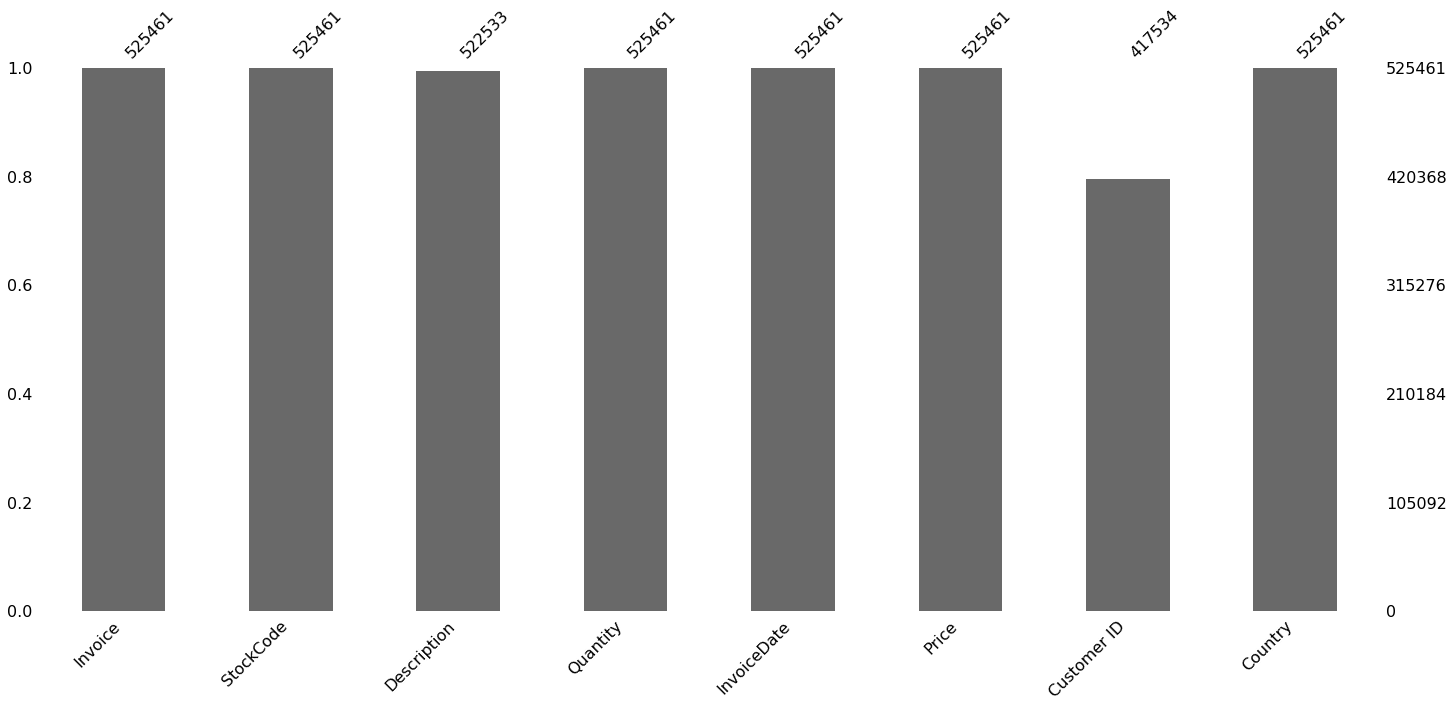

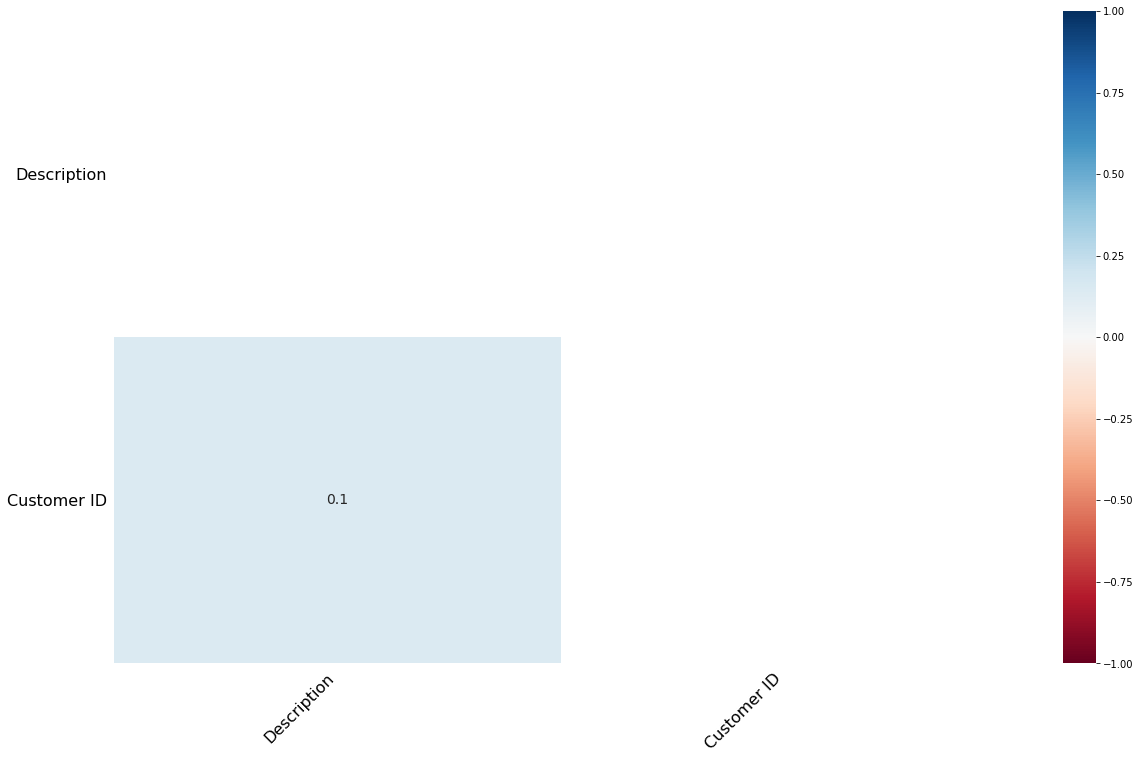

In [9]:
#Visualizing Missing values using missno library
msno.bar(retaildata);
msno.heatmap(retaildata);

###### We can see there is substaintial amount of Description missing.
 Dropping all missing values as without custumer Id and Description field  we cannot perform association and clusturing as these are main features of the dataset. We cannot impute these values based on the available data as well.


In [10]:
# Drop all missing values
retaildata.dropna(inplace=True)
#Verifying the null values
retaildata.isnull().sum()


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [11]:
retaildata.shape

(417534, 8)

In [12]:
# Grouping countries by Total quantity
retaildata.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

Country
United Kingdom          4344969
Denmark                  227030
Netherlands              181823
EIRE                     177044
Germany                  107133
France                    73490
Sweden                    52100
Switzerland               22053
Australia                 20053
Spain                     18332
Belgium                   11980
Portugal                  11716
Channel Islands           10994
Norway                     7863
Italy                      7310
Japan                      6604
Austria                    6479
Greece                     6151
United Arab Emirates       4739
Cyprus                     4371
Finland                    3651
Unspecified                3314
USA                        2666
Thailand                   2552
Lithuania                  2306
Poland                     1991
Singapore                  1753
Malta                      1547
Israel                     1132
Canada                      894
Iceland                     828


In [13]:
#Finding the duplicate transactions in the dataset
print("Duplicated Transactions")
retaildata.duplicated().sum()

Duplicated Transactions


6771

In [14]:
#Removing Duplicated Transactions
retaildata.drop_duplicates(inplace = True)
print("Dataset shape after removing duplicates transactions")
retaildata.shape

Dataset shape after removing duplicates transactions


(410763, 8)

In [15]:
print("Total Products: ", len(retaildata['StockCode'].unique()))
print("Total Transactions: ",len(retaildata['Invoice'].unique()))
print('Total customers: ', len(retaildata['Customer ID'].unique()) )
        

Total Products:  4031
Total Transactions:  23587
Total customers:  4383



We have observed that there are lot of missing values in the field custumer id before.
Let see if these null values in custumer id is associated with any countries.

In [16]:
#Initial Countries
initial_countries

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [17]:
#Types of Country
retaildata.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)


We can observe that the 3 countries Bermuda , Hong Kong and Lebanon has not stored the custumer Id for each transaction. Thus we are not considering these countries for our analysis at this time.


The price and the quantities of entries without a customer ID can show extreme outliers. As we might want to create features later on that are based on historical prices and sold quantities, this is very disruptive. 

In [18]:
retaildata[retaildata['Invoice'].apply(lambda x: int('C' in str(x)))==1]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [19]:
# Checking transaction record for a customer
retaildata.loc[retaildata['Customer ID'] == 16321].sort_values(by = ['Price','Quantity','InvoiceDate'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
194,489450,84970S,HANGING HEART ZINC T-LIGHT HOLDER,24,2009-12-01 10:36:00,0.85,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
192,489450,21871,SAVE THE PLANET MUG,12,2009-12-01 10:36:00,1.25,16321.0,Australia
193,489450,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 10:36:00,1.25,16321.0,Australia
135100,502275,22585,PACK OF 6 BIRDY GIFT TAGS,12,2010-03-23 16:01:00,1.25,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
188,489450,85206A,CREAM FELT EASTER EGG BASKET,6,2009-12-01 10:36:00,1.65,16321.0,Australia
135099,502275,85206A,CREAM FELT EASTER EGG BASKET,12,2010-03-23 16:01:00,1.65,16321.0,Australia


It seems that the  tranaction C489449 and 489450 are similar , except fot the negative value of quantity associated with the cancelled transaction.It seems that a cancelled transaction has a corresponding counter part transaction also. The Cancelled transaction can also contribute to the analysis as the order is placed , but some how it was rejected by custumer. But the behavior of shopping is retained.So  we just eliminated all the cancelled transaction while keeping the counterpart with in the datasset

In [0]:
#Removing the cancelled transaction on Retail Data
cancelled_index=retaildata[retaildata['Invoice'].apply(lambda x: int('C' in str(x)))==1].index
retaildata.drop(cancelled_index , inplace=True)

In [0]:
#Filtering the dataset by choosing positive values of Quantity and retaildata
retaildata = retaildata[(retaildata.Quantity>0) & (retaildata.Price > 0)]

In [22]:
retaildata

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [0]:
#Saving the filtered data into new file
retaildata.to_csv('filtered_data.csv') 